In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.neighbors._base

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('/Users/andrewzhou/Downloads/07-18-13 to 07-18-23, UG:L.csv')
df.drop(columns='Sites',axis=1, inplace=True)
df.head()


,"CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN","CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN","DEPTH, SECCHI DISK DEPTH","NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)",PHOSPHORUS,TURBIDITY
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,10.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.dropna(axis=0,how='all',inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590700 entries, 2 to 712475
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                       141748 non-null  object 
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     81350 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                                      403334 non-null  float64
 3   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  67763 non-null   float64
 4   PHOSPHORUS                                                    230435 non-null  float64
 5   TURBIDITY                                                     180232 non-null  float64
dtypes: float64(5), object(1)
memory usage: 31.5+ MB


In [46]:

#Eliminating rows with nan
#df = df.replace(np.nan,0,regex=True)
df = df[df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'].between(0, 5000)]
df = df[df['PHOSPHORUS'].between(0, 450)]
df = df[df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'].between(0, 200)]
df = df[df['DEPTH, SECCHI DISK DEPTH'].between(0, 350)]
#df = df[df['CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN'].between(0, 1000000)]
#df.drop(columns=['TOTAL NITROGEN, MIXED FORMS','TURBIDITY','ORTHOPHOSPHATE'],axis=1,inplace=True)
df.drop(columns=['TURBIDITY','CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29621 entries, 1775 to 531176
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     29621 non-null  float64
 1   DEPTH, SECCHI DISK DEPTH                                      29621 non-null  float64
 2   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  29621 non-null  float64
 3   PHOSPHORUS                                                    29621 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [47]:
#Separating X and y variables
X=df.loc[:,df.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29621 entries, 1775 to 531176
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN  29621 non-null  float64
 1   DEPTH, SECCHI DISK DEPTH                   29621 non-null  float64
 2   PHOSPHORUS                                 29621 non-null  float64
dtypes: float64(3)
memory usage: 925.7 KB


Testing methods to impute missing data

In [48]:
#Resolve dependency naming issue
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#Miss Forest
from missingpy import MissForest


imputer = MissForest()
X_MF = imputer.fit_transform(X)
X_MF = pd.DataFrame(X_MF, columns = X.columns).round(1)

In [49]:
#KNN Imputer
from sklearn.impute import KNNImputer


imputer = KNNImputer() 
X_KNN = imputer.fit_transform(X)
X_KNN = pd.DataFrame(X_KNN, columns = X.columns).round(1)


In [50]:
#X_train_MF.info()
#X_train_MF.head()
#df.plot(kind='scatter',y='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)',x='PHOSPHORUS')


<Axes: xlabel='PHOSPHORUS', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

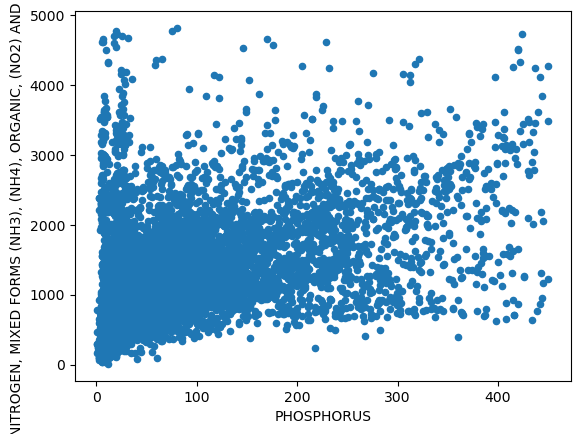

In [51]:
#Nitrogen vs Phosphorus Plot
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS')
#df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))
#df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))


<Axes: xlabel='CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

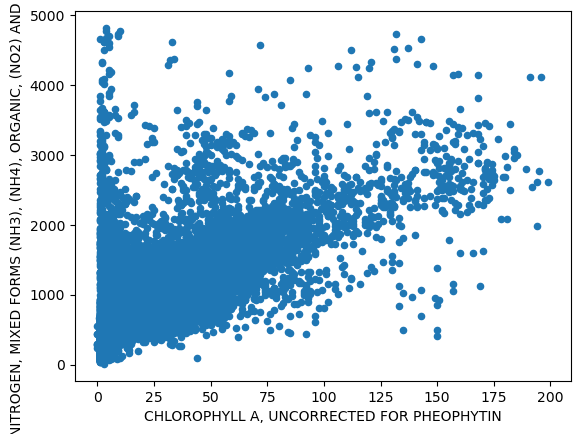

In [52]:
#Nitrogen vs Chlorophyll A, uncorrected plot
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN')
#df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN',xlim=(0,1000),ylim=(0,7000))
#df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN',xlim=(0,1000),ylim=(0,7000))


<Axes: xlabel='DEPTH, SECCHI DISK DEPTH', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

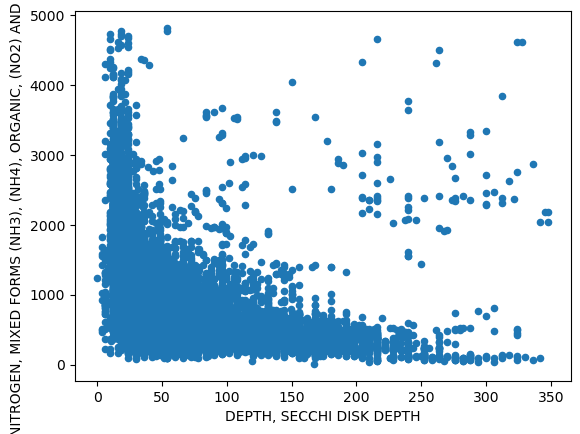

In [53]:
#Nitrogen vs Secchi Disk Depth
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH')
#df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))
#df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))


KeyError: 'ORTHOPHOSPHATE'

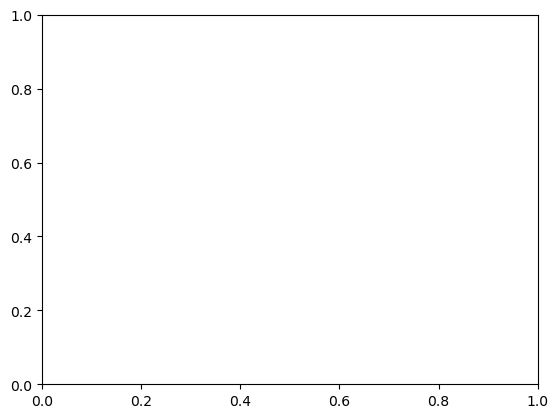

In [54]:
#Nitrogen vs Orthophosphate
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'ORTHOPHOSPHATE')
#df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'ORTHOPHOSPHATE',ylim=(0,6900),xlim=(0,700))
#df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'ORTHOPHOSPHATE',ylim=(0,6900),xlim=(0,700))

In [ ]:
# Toggle imputation
X = X_MF

In [55]:
#Making train and test sets only from important features
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state = 1)

In [62]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor(random_state=True,warm_start=True,criterion='absolute_error',max_depth=100)


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 86.90%
The accuracy for the test set is 58.09%


In [57]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    0.503655
PHOSPHORUS                                   0.263718
DEPTH, SECCHI DISK DEPTH                     0.232626
dtype: float64


In [58]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 70.19%
The accuracy for the test set is 56.49%


In [59]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 91.81%
The accuracy for the test set is 31.09%


In [60]:
from sklearn import svm


model = svm.SVR()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 37.97%
The accuracy for the test set is 37.26%


Scaling Train and Test Sets

In [63]:
#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
print(X_train_scaled.mean(axis=0))
print(X_test_scaled.mean(axis=0))

CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    5.197533e-17
DEPTH, SECCHI DISK DEPTH                     7.716337e-17
PHOSPHORUS                                  -5.057599e-17
dtype: float64
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    0.015353
DEPTH, SECCHI DISK DEPTH                    -0.008744
PHOSPHORUS                                   0.024382
dtype: float64


In [64]:
#Scaled RF accuracy
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
#random_state=True,warm_start=True,criterion='absolute_error',max_depth=100

model.fit(X_train_scaled, Y_train)
train_accuracy = model.score(X_train_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 87.87%
The accuracy for the test set is 56.28%


Cross-validation

In [65]:
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score

clf = RandomForestRegressor()

k_folds = KFold(n_splits = 10)
shuffle_split = ShuffleSplit(n_splits=10,test_size=.2)

scores = cross_val_score(clf, X, Y, cv = shuffle_split)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.55733667 0.55313989 0.54366675 0.57647798 0.57454706 0.55922963
 0.54707627 0.59235841 0.53270075 0.54704274]
Average CV Score:  0.5583576149737861
Number of CV Scores used in Average:  10


Clustering

In [66]:
# MeanShift with train-test-split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Train the MeanShift model on the training data with a manually set bandwidth
bandwidth = 1.5  # You can adjust this value as needed
model = MeanShift(bandwidth=bandwidth)
model.fit(X_train)

# Make predictions on the test data using the trained model
preds = model.predict(X_test)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_test, preds)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.21265783492275198


In [67]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html

number of estimated clusters : 8


In [68]:
# MeanShift without train-test-split
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

# Train the MeanShift model on the training data with a manually set bandwidth
bandwidth = 1.0  # You can adjust this value as needed
model = MeanShift(bandwidth=bandwidth)
model.fit(df)

# Make predictions on the test data using the trained model
preds = model.predict(df)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df, preds)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.10455706612861548
